In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import plot_model


In [ ]:
fashionmnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashionmnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


## **Classes of Images:**

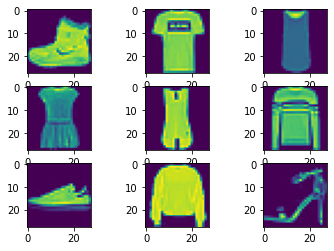

In [ ]:
fig,ax=plt.subplots(3,3)
c=[]
for i in range(0,9):
  a=x_train[i]
  a=a.reshape(28,28)
  c.append(a)



ax[0,0].imshow(c[0])
ax[0,1].imshow(c[1])
ax[0,2].imshow(c[2])
ax[1,0].imshow(c[3])
ax[1,1].imshow(c[4])
ax[1,2].imshow(c[5])
ax[2,0].imshow(c[6])
ax[2,1].imshow(c[7])
ax[2,2].imshow(c[8])


# **Image Preprocessing:**

In [ ]:
x_train,x_test=x_train/255.0,x_test/255.0
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

# **Sequential Model(Using Early Stopping):** 

In [ ]:
seqmodel=tf.keras.Sequential(
[
 tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'),
 tf.keras.layers.MaxPool2D(2,2),
 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
 tf.keras.layers.MaxPool2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(units=512,activation='relu'),
 tf.keras.layers.Dense(units=256,activation='relu'),
 tf.keras.layers.Dense(units=10,activation='softmax')
])


In [ ]:
seqmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',baseline=5,mode='auto',restore_best_weights=True)
analysis=seqmodel.fit(x_train,y_train,epochs=5,callbacks=[callback])

Epoch 1/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.4470 - accuracy: 0.8342
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2937 - accuracy: 0.8895
Epoch 3/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2502 - accuracy: 0.9066
Epoch 4/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.2171 - accuracy: 0.9183
Epoch 5/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1900 - accuracy: 0.9274


# **Plotting the Model:**

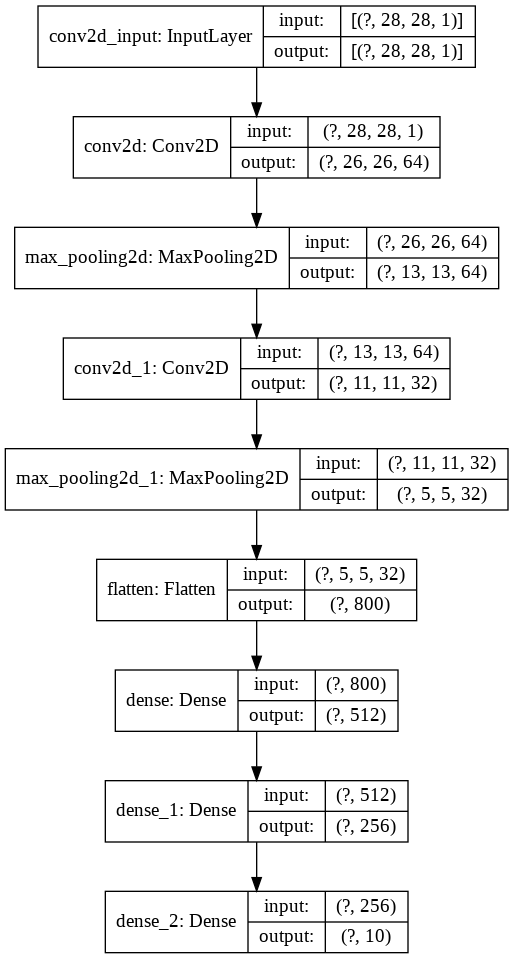

In [ ]:
tf.keras.utils.plot_model(seqmodel,"SequentialMosel.png",show_shapes=True)

## **ModelEvaluation:**

In [ ]:
seqmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               410112    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1

In [ ]:
seqmodel.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2723 - accuracy: 0.9089


[0.272306889295578, 0.9089000225067139]

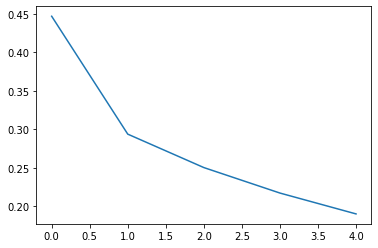

In [ ]:
plt.plot(analysis.history["loss"])

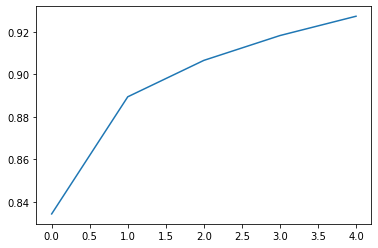

In [ ]:
plt.plot(analysis.history["accuracy"])

## **Accuracy on Test Dataset:**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred=seqmodel.predict_classes(x_test)
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred),"\n")
print("Accuracy Score\n",accuracy_score(y_test,y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion Matrix
 [[925   1  16   8   3   0  41   0   6   0]
 [  3 983   0   6   3   0   4   0   1   0]
 [ 18   0 893  10  38   0  40   0   1   0]
 [ 26   4   8 921  17   0  23   0   1   0]
 [  0   1  82  31 842   0  44   0   0   0]
 [  0   0   0   0   0 992   0   5   0   3]
 [182   3  85  17  79   0 629   0   5   0]
 [  0   0   0   0   0  19   0 959   0  22]
 [  9   0   0   2   1   1   3   0 984   0]
 [  1   0   0   0   0   6   0  32   0 961]] 

Accuracy Score
 0.9089


# **Functional Model(Using class MyCallback):**

In [ ]:
 input=tf.keras.layers.Input((28,28,1))
 conv1=tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu')(input)
 maxpool1=tf.keras.layers.MaxPool2D(2,2)(conv1)
 conv2=tf.keras.layers.Conv2D(64,(3,3),activation='relu')(maxpool1)
 maxpool2=tf.keras.layers.MaxPool2D(2,2)(conv2)
 flatten=tf.keras.layers.Flatten()(maxpool2)
 hid1=tf.keras.layers.Dense(units=512,activation='relu')(flatten)
 hid2=tf.keras.layers.Dense(units=256,activation='relu')(hid1)
 output=tf.keras.layers.Dense(units=10,activation='softmax')(hid2)

 funcmodel=tf.keras.Model(outputs=output,inputs=input)

In [ ]:
funcmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if(logs.get("accuracy")>95):
      print("Training has been stopped since it can be overfitted:")
      self.funcmodel.stop_training=True

callback=MyCallback()

history=funcmodel.fit(x_train,y_train,epochs=5,callbacks=[callback])

Epoch 1/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.4218 - accuracy: 0.8429
Epoch 2/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2760 - accuracy: 0.8984
Epoch 3/5
1875/1875 [==============================] - 97s 51ms/step - loss: 0.2327 - accuracy: 0.9119
Epoch 4/5
1875/1875 [==============================] - 95s 50ms/step - loss: 0.2018 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.1719 - accuracy: 0.9345


In [ ]:
funcmodel.layers

In [ ]:
for layer in funcmodel.layers:
  print(layer.output)

Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(None, 26, 26, 64), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(None, 13, 13, 64), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(None, 11, 11, 64), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(None, 5, 5, 64), dtype=float32)
Tensor("flatten_1/Reshape:0", shape=(None, 1600), dtype=float32)
Tensor("dense_3/Relu:0", shape=(None, 512), dtype=float32)
Tensor("dense_4/Relu:0", shape=(None, 256), dtype=float32)
Tensor("dense_5/Softmax:0", shape=(None, 10), dtype=float32)


In [ ]:
for layer in funcmodel.layers:
  print(layer.input)

Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(None, 26, 26, 64), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(None, 13, 13, 64), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(None, 11, 11, 64), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(None, 5, 5, 64), dtype=float32)
Tensor("flatten_1/Reshape:0", shape=(None, 1600), dtype=float32)
Tensor("dense_3/Relu:0", shape=(None, 512), dtype=float32)
Tensor("dense_4/Relu:0", shape=(None, 256), dtype=float32)


In [ ]:
funcmodel.input

<tf.Tensor 'input_1:0' shape=(None, 28, 28, 1) dtype=float32>

In [ ]:
funcmodel.output

<tf.Tensor 'dense_5/Softmax:0' shape=(None, 10) dtype=float32>

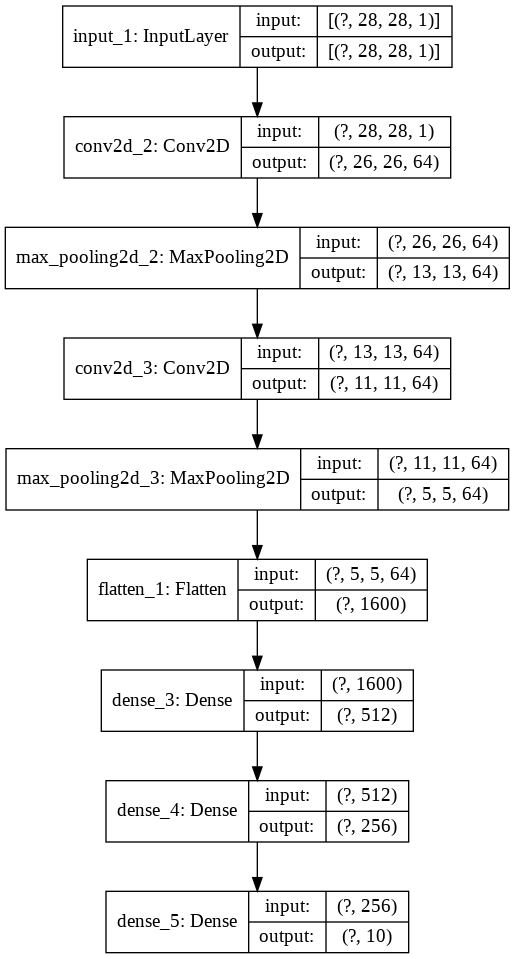

In [ ]:
tf.keras.utils.plot_model(funcmodel,"Function Model.png",show_shapes=True)

In [ ]:
funcmodel.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)              

In [ ]:
funcmodel.evaluate(x_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.2565 - accuracy: 0.9103


[0.25654730200767517, 0.9103000164031982]

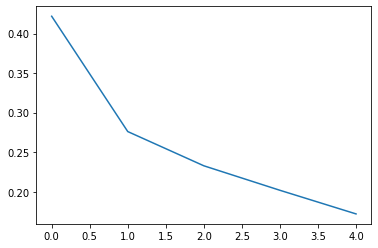

In [ ]:
plt.plot(history.history["loss"])

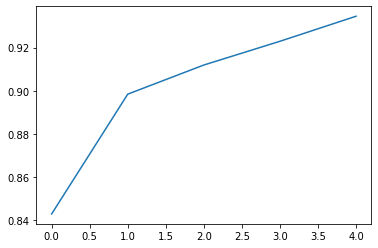

In [ ]:
plt.plot(history.history["accuracy"])

## **Visualization of the Filters of the 1st Covolutional Layer:**

In [ ]:
filters,bias=funcmodel.layers[1].get_weights()

In [ ]:
filters.shape

(3, 3, 1, 64)

**These are the 64 filters of the first convolutional layer of the model:**

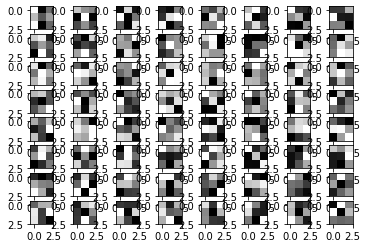

In [ ]:
fig,filtax=plt.subplots(8,8)

filter_number=0
for i in range(0,8):
  for j in range(0,8):
    filtax[i,j].imshow(filters[:,:,0,filter_number],cmap='gray')
    filter_number+=1


# **Visualization of the Filter Maps of the Convolutional Layers:**



In [ ]:
ConvolutionNumber=1
FirstImage=y_train[0]
SecondImage=y_train[1]
ThirdImage=y_train[2]



layer_outputs=[layer.output for layer in funcmodel.layers]
model=tf.keras.models.Model(inputs=funcmodel.input,outputs=layer_outputs)



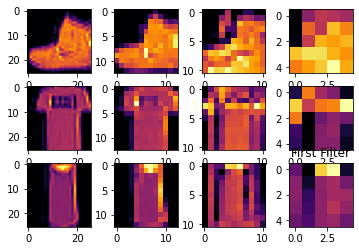

In [ ]:
fig,axes=plt.subplots(3,4)

#1st filter of the convolutional Layer for Three different images.


for i in range(0,4):
  image1=model.predict(x_train[0].reshape(1,28,28,1))[i+1]
  axes[0,i].imshow(image1[0,:,:,0],cmap='inferno')
  axes[0,i].grid(False)
  image2=model.predict(x_train[1].reshape(1,28,28,1))[i+1]
  axes[1,i].imshow(image2[0,:,:,0],cmap='inferno')
  axes[1,i].grid(False)
  image3=model.predict(x_train[2].reshape(1,28,28,1))[i+1]
  axes[2,i].imshow(image3[0,:,:,0],cmap='inferno')
  axes[2,i].grid(False)
  
  




In [ ]:
funcmodel.save('fmnist.h5')